# DFT 1D de um sinal senoidal

Este notebook trará a DFT de um sinal senoidal composto pela superposição de sinais com diferentes frequências e amplitude. Além disso, este código trará também o espectro de amplitude deste sinal. 

**[Referência]** 

* Yilmaz, Öz (2001). Seismic Data Analysis: Processing, Inversion, and Interpretation of Seismic Data, 2 ed.: Society of Exploration Geophysicists. ISBN 1-56080-098-4

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftshift, ifftshift, fftfreq

## Gerando uma função senoidal com diferentes frequências e ampitudes

### Parâmetros para calcular os pontos para a função

In [2]:
n = 800
T0 = 1.
dt = T0/(n)

In [3]:
print (dt)

0.00125


In [4]:
t = np.linspace(0.,n*dt,num=n)

### Definindo o sinal sintético

In [5]:
def synthetic_signal(A, f, t):
    signal = np.zeros_like(t)
    for Ai, fi in zip(A, f):
        signal += Ai*np.sin(2*np.pi*fi*t)
    return signal

In [6]:
f = [5, 15, 20]
A = [15,10,5]

In [7]:
signal = synthetic_signal(A, f, t)

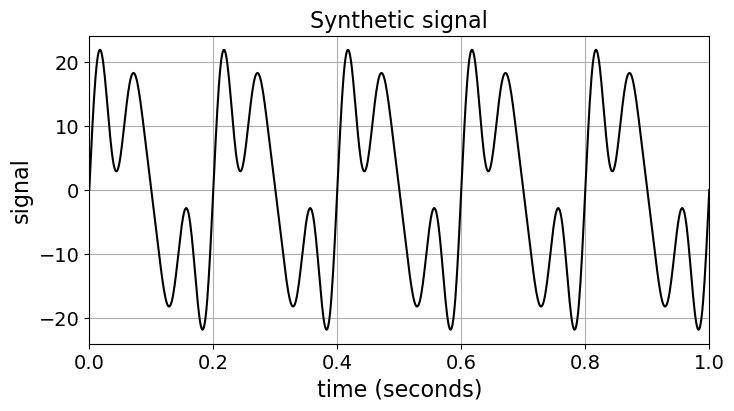

In [8]:
plt.figure(figsize=(8,4))
plt.title('Synthetic signal',fontsize=16)
plt.plot(t,signal,'k-')
plt.xlim(np.min(t),np.max(t))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('time (seconds)',fontsize=16)
plt.ylabel('signal',fontsize=16)
plt.grid()
plt.show()

In [9]:
signal1 = synthetic_signal([A[0]], [f[0]], t)
signal2 = synthetic_signal([A[1]], [f[1]], t)
signal3 = synthetic_signal([A[2]], [f[2]], t)

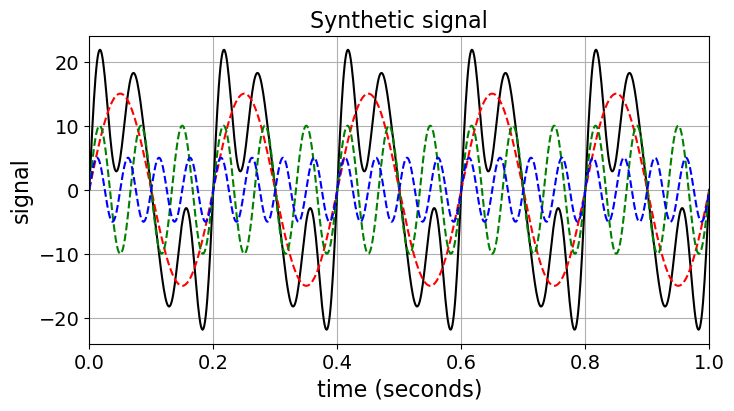

In [10]:
plt.figure(figsize=(8,4))
plt.title('Synthetic signal',fontsize=16)
plt.plot(t,signal,'k-')
plt.plot(t,signal1,'r--')
plt.plot(t,signal2,'g--')
plt.plot(t,signal3,'b--')
plt.xlim(np.min(t),np.max(t))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('time (seconds)',fontsize=16)
plt.ylabel('signal',fontsize=16)
plt.grid()
plt.show()

## Aplicando a transformada de fourier ao sinal

In [11]:
FT_signal = fft(x=signal,norm=None)

In [12]:
amplitude = np.abs(FT_signal)
amplitude /= np.max(amplitude)
frequencies = fftfreq(n=n,d=dt)

In [13]:
fN = 1/(2*dt)
print ('frequencia de Nyquist:', fN, 'Hertz' )

frequencia de Nyquist: 400.0 Hertz


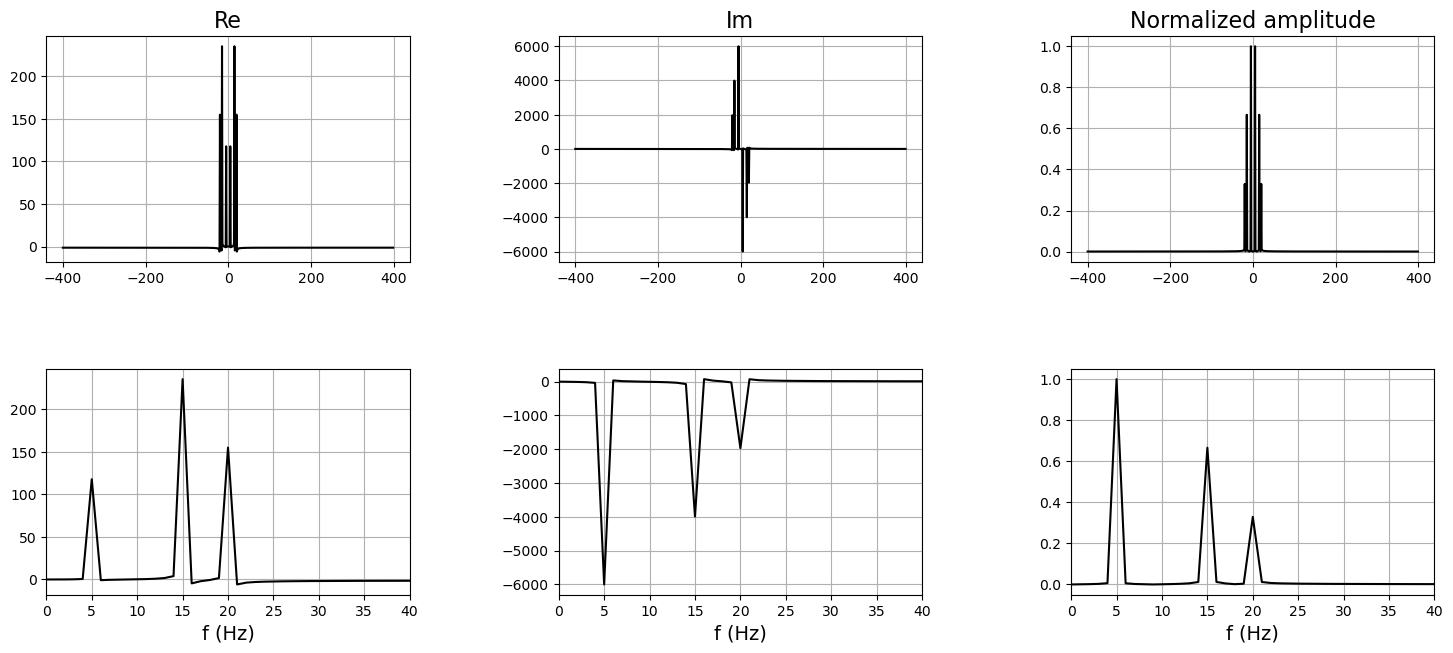

In [14]:
plt.figure(figsize=(16,8))

plt.subplot(231)
plt.title('Re', fontsize=16)
plt.plot(fftshift(frequencies), fftshift(FT_signal).real, 'k-')
plt.grid()
#plt.xlim(-20, 20)
#plt.xlabel('f (Hz)', fontsize=14)

plt.subplot(232)
plt.title('Im', fontsize=16)
plt.plot(fftshift(frequencies), fftshift(FT_signal).imag, 'k-')
plt.grid()
#plt.xlabel('f (Hz)', fontsize=14)

plt.subplot(233)
plt.title('Normalized amplitude', fontsize=16)
plt.plot(fftshift(frequencies), fftshift(amplitude), 'k-')
plt.grid()
#plt.xlabel('f (Hz)', fontsize=14)

plt.subplot(234)
plt.plot(frequencies[:n//2], FT_signal[:n//2].real, 'k-')
plt.xlim(0,40)
plt.grid()
plt.xlabel('f (Hz)', fontsize=14)

plt.subplot(235)
plt.plot(frequencies[:n//2], FT_signal[:n//2].imag, 'k-')
plt.xlim(0,40)
plt.grid()
plt.xlabel('f (Hz)', fontsize=14)

plt.subplot(236)
plt.plot(frequencies[:n//2], amplitude[:n//2], 'k-')
plt.xlim(0,40)
plt.grid()
plt.xlabel('f (Hz)', fontsize=14)

plt.tight_layout(pad=6.0)

plt.show()